In [1]:
%matplotlib widget

# Session 2

## First X-ray radiograph simulations with ![gVXR](../img/gvxr_logo.png)

## Author: Franck Vidal

(version 1.0, 22 Sep 2022)

# Aims of this session

- Create our first X-ray simulation, step-by-step;
- Save our X-ray image in a file format that preserves the original dynamic range;
- Visualise the results with 3 different look-up tables;
- Visualise the 3D environment.

![](../img/02-visualisation.png)

# Main steps

![](../img/dragon2.jpg)

There are 6 main steps to simulate an X-ray image:

1. Create a renderer (OpenGL context);
2. Set the X-ray source;
3. Set the Spectrum;
4. Set the Detector;
5. Set the Sample; and
6. Compute the corresponding X-ray image.

# Import packages

In [2]:
import os
import numpy as np # Who does not use Numpy?

import matplotlib # To plot images
import matplotlib.pyplot as plt # Plotting
from matplotlib.colors import LogNorm # Look up table
from matplotlib.colors import PowerNorm # Look up table

font = {'family' : 'serif',
         'size'   : 10
       }
matplotlib.rc('font', **font)

# Uncomment the line below to use LaTeX fonts
# matplotlib.rc('text', usetex=True)

from tifffile import imread, imwrite # Write TIFF files

import base64 # Save the visualisation

from gvxrPython3 import gvxr # Simulate X-ray images
from gvxrPython3 import json2gvxr # Set the simulation parameters using a JSON file
from gvxrPython3.utils import saveProjections # Plot the X-ray image in linear, log and power law scales
from gvxrPython3.utils import compareWithGroundTruth # Plot the ground truth, the test image, and the relative error map in %
from gvxrPython3.utils import interactPlotPowerLaw # Plot the X-ray image using a Power law look-up table
from gvxrPython3.utils import visualise # Visualise the 3D environment if k3D is supported

Speckpy is not install, you won't be able to load a beam spectrum using Speckpy
SimpleGVXR 2.0.2 (2022-09-23T13:26:05) [Compiler: GNU g++] on Linux
gVirtualXRay core library (gvxr) 2.0.2 (2022-09-23T13:26:05) [Compiler: GNU g++] on Linux
Speckpy is not install, you won't be able to load a beam spectrum using Speckpy
SimpleGVXR 2.0.2 (2022-09-23T13:26:05) [Compiler: GNU g++] on Linux
gVirtualXRay core library (gvxr) 2.0.2 (2022-09-23T13:26:05) [Compiler: GNU g++] on Linux


# Create an OpenGL context

- Create an interactive window (available on Linux, MacOS, and Windows)
- Create a context without a window using EGL (available on Linux and MacOS, but not Windows)
    - use on desktop computers,
    - supercomputers, or 
    - the cloud.

```python
json2gvxr.initGVXR(
    "fname.json", # string: the path+name of the JSON file
    backend # string: OPENGL or EGL (EGL for this training)
)
```

In [3]:
print("Create an OpenGL context")

json2gvxr.initGVXR("notebook2.json", "EGL")

Create an OpenGL context
Create an OpenGL context: 800x450


Wed Sep 28 19:59:08 2022 ---- Create window (ID: -1)
Wed Sep 28 19:59:08 2022 ---- Query the number of EGL devices
Wed Sep 28 19:59:08 2022 ---- Success
Wed Sep 28 19:59:08 2022 ---- Detected 2 EGL devices.
Wed Sep 28 19:59:08 2022 ---- Print the details here of every EGL device.
Wed Sep 28 19:59:08 2022 ---- Success
Wed Sep 28 19:59:08 2022 ---- Device 1/2:
Wed Sep 28 19:59:08 2022 ---- 	Device Extensions: EGL_NV_device_cuda EGL_EXT_device_drm EGL_EXT_device_drm_render_node EGL_EXT_device_query_name EGL_EXT_device_persistent_id
Wed Sep 28 19:59:08 2022 ---- 	Device vendor: NVIDIA
Wed Sep 28 19:59:08 2022 ---- 	Failed to retrieve EGL DRM device file.
Wed Sep 28 19:59:08 2022 ---- Device 2/2:
Wed Sep 28 19:59:08 2022 ---- 	Device Extensions: EGL_MESA_device_software
Wed Sep 28 19:59:08 2022 ---- 	Failed to retrieve device vendor.
Wed Sep 28 19:59:08 2022 ---- 	Failed to retrieve EGL DRM device file.
Wed Sep 28 19:59:08 2022 ---- EGL client extensions: EGL_EXT_platform_base EGL_EXT_devic

# Set the X-ray source
    
```python
json2gvxr.initSourceGeometry()
```

In [4]:
json2gvxr.initSourceGeometry()

Set up the beam
	Source position: [0, -40, 0, 'cm']
	Source shape: PointSource


- Shape:
    - Cone beam: `gvxr.usePointSource()`, or
    - Parallel (e.g. synchrotron): `gvxr.useParallelBeam();`

# Set the spectrum

```python
json2gvxr.initSpectrum()
```

In [5]:
json2gvxr.initSpectrum()

({80: 1000}, 'keV', array([80]), array([1000]))

# Set the detector:
    
```python
json2gvxr.initDetector()
```

In [6]:
json2gvxr.initDetector()

Set up the detector
	Detector position: [0, 10, 0, 'cm']
	Detector up vector: [0, 0, -1]
	Detector number of pixels: [640, 320]
	Pixel spacing: [0.5, 0.5, 'mm']


Wed Sep 28 19:59:08 2022 ---- Initialise the renderer


# Set the sample

- Welsh dragon in a STL file:
    - ID: "Dragon",
    - fname: "input_data/welsh-dragon-small.stl",
    - Unit: mm.
    
```python
gvxr.loadMeshFile(
    ID, # string
    fname, # string
    unit of length # string, e.g. "mm"
)
```    

In [7]:
json2gvxr.initSamples("notebook2.json")

Wed Sep 28 19:59:08 2022 ---- file_name:	../input_data/welsh-dragon-small.stl	nb_faces:	457345	nb_vertices:	1372035	bounding_box (in cm):	(-4.47065, -74.9368, 23.5909)	(2.37482, -59.4256, 36.0343)


# Compute the corresponding X-ray image

Get a 2D array

```python
xray_image = gvxr.computeXRayImage()
```

or make sure it's a Numpy array in float32 with

```python
xray_image = np.array(gvxr.computeXRayImage()).astype(np.single)
```

In [8]:
xray_image = np.array(gvxr.computeXRayImage()).astype(np.single)

# Create the output directory if needed

In [9]:
if not os.path.exists("output_data"):
    os.mkdir("output_data")

# Save the X-ray image in a TIFF file and store the data using single-precision floating-point numbers.

- using gVXR directly
    - fname = output_data/02-gvxr-save.tif

```python
gvxr.saveLastXRayImage(
    fname # string
)
```

In [10]:
gvxr.saveLastXRayImage("output_data/02-gvxr-save.tif")

- using the tifffile package
    - fname = output_data/02-tifffile-save.tif

```python
from tifffile import imwrite
imwrite(
    fname, # string
    xray_image # 2D array
)
```

In [11]:
imwrite("output_data/02-tifffile-save.tif", xray_image)

# Display the X-ray image

# using a linear colour scale

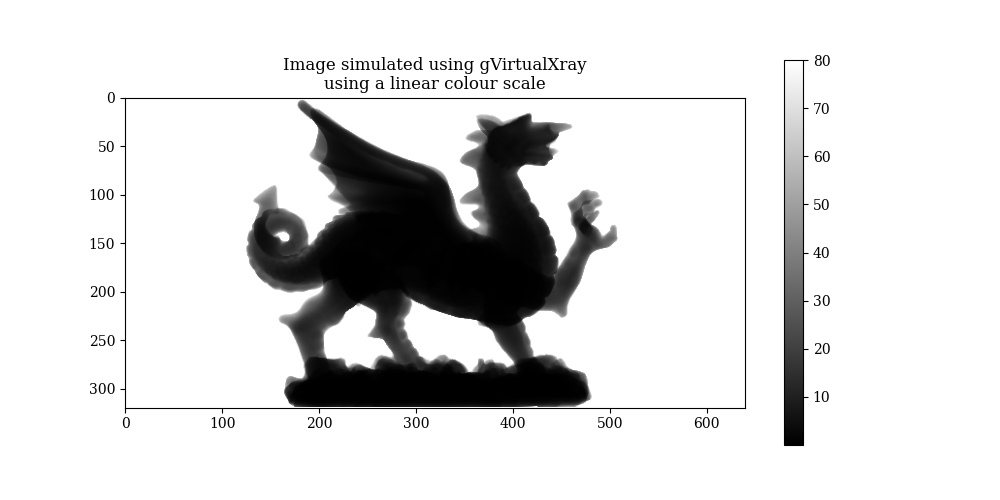

In [12]:
plt.figure(figsize=(10, 5))
plt.title("Image simulated using gVirtualXray\nusing a linear colour scale")
plt.imshow(xray_image, cmap="gray")
plt.colorbar(orientation='vertical');
plt.margins(0,0)

# using a logarithmic colour scale

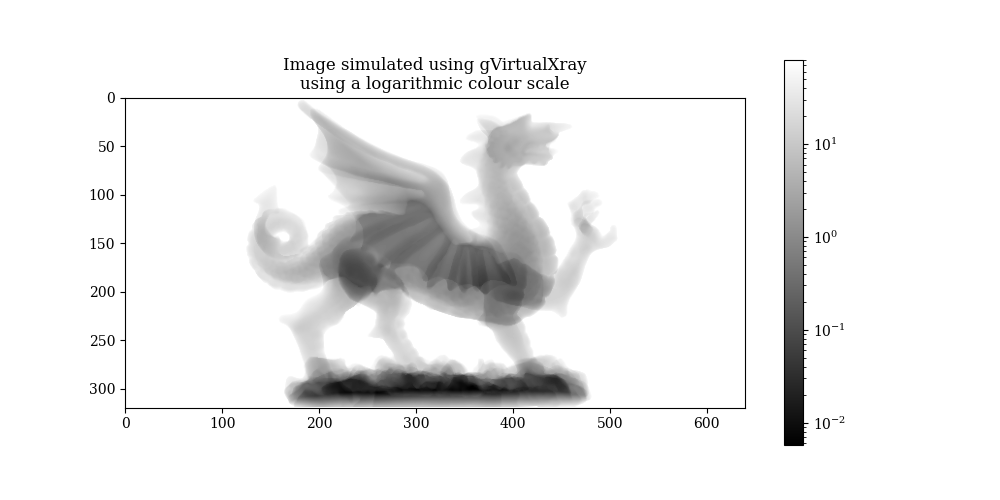

In [13]:
plt.figure(figsize=(10, 5))
plt.title("Image simulated using gVirtualXray\nusing a logarithmic colour scale")
plt.imshow(xray_image, cmap="gray", norm=LogNorm(vmin=xray_image.min(), vmax=xray_image.max()))
plt.colorbar(orientation='vertical');
plt.margins(0,0)

# Using a Power-law colour scale

In [14]:
interactPlotPowerLaw(xray_image, gamma=1.5, figsize=(10, 5))

interactive(children=(FloatSlider(value=1.5, description='gamma', max=10.0, min=0.01, step=0.5), Output()), _d…

# Display the X-ray image and compare three different lookup tables

Replace `???` below with the value of gamma that you selected above.

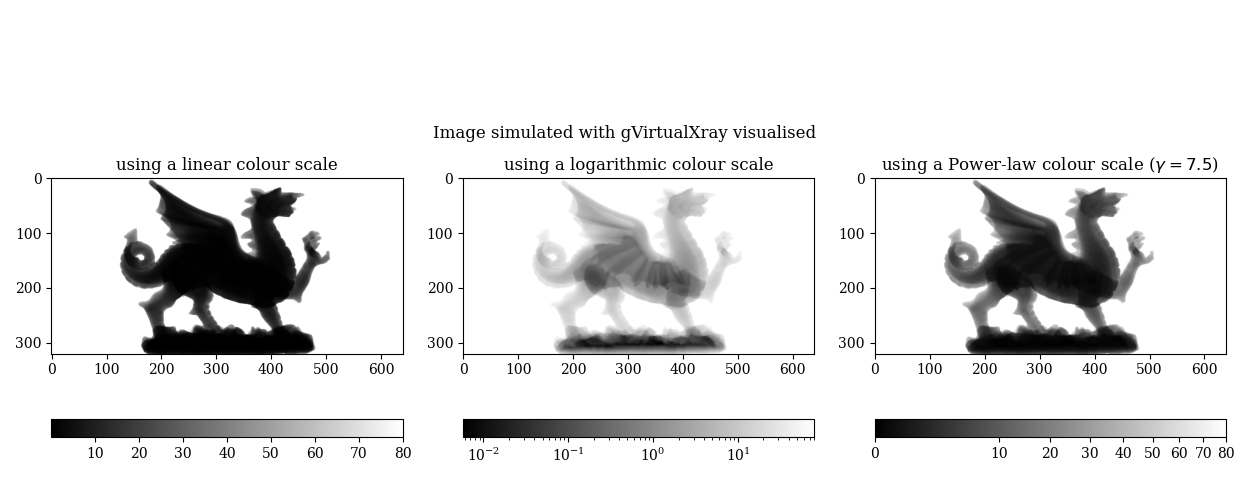

In [15]:
saveProjections(xray_image, "output_data/02-projections-dragon-TiAlV.pdf", gamma=7.5, figsize=(12.5, 5))

# Get some image statistics using Numpy

and compare with the values I got. We should get the same, or at least something comparable.

| What? | Value (in keV) |
|-------|-------|
| Min pixel value: | 0.0056294748 |
| Mean pixel value: | 56.367035 |
| Median pixel value: | 80.0 |
| Stddev pixel value: | 33.96409 |
| Max pixel value: | 80.0 |

In [16]:
print("Min pixel value:", np.min(xray_image))
print("Mean pixel value:", np.mean(xray_image))
print("Median pixel value:", np.median(xray_image))
print("Stddev pixel value:", np.std(xray_image))
print("Max pixel value:", np.max(xray_image))

Min pixel value: 0.0057522994
Mean pixel value: 56.37729
Median pixel value: 80.0
Stddev pixel value: 33.952602
Max pixel value: 80.0


# Compare with the ground truth

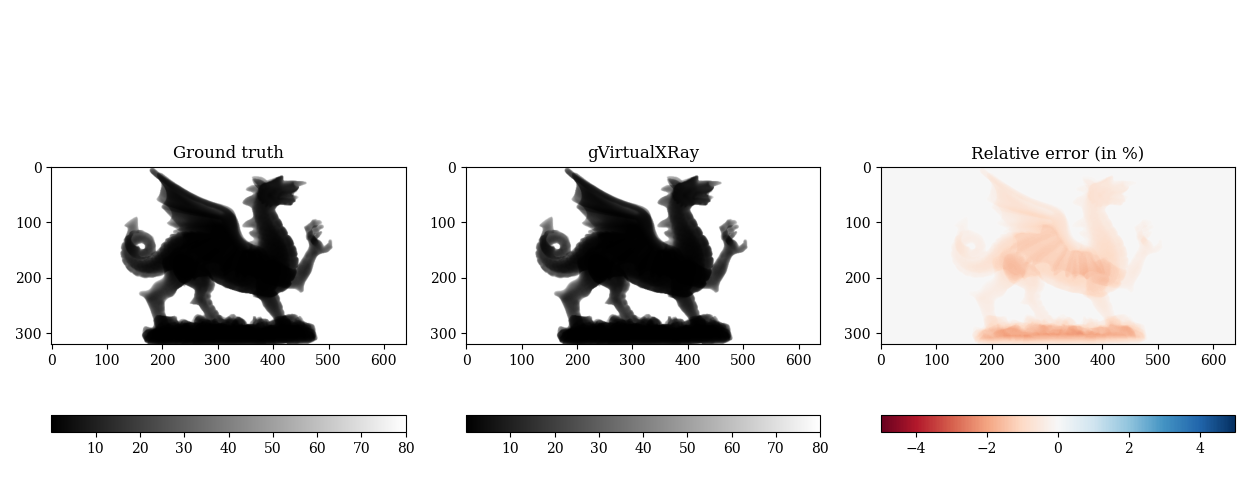

In [17]:
ground_truth = imread("../input_data/02-dragon-TiAlV-groundtruth.tif")
compareWithGroundTruth(ground_truth, xray_image, figsize=(12.5, 5))

# Change the sample's colour

By default the object is white, which is not always pretty. Let's change it to purple.

In [18]:
red = 102 / 255
green = 51 / 255
blue = 153 / 255
gvxr.setColour("Dragon", red, green, blue, 1.0)

# 3D visualisation using k3D if possible

In [19]:
plot=visualise(use_log=True)
plot.display()

Output()

In [20]:
if plot is not None:
    plot.fetch_screenshot()

    data = base64.b64decode(plot.screenshot)
    with open("output_data/02-visualisation.png",'wb') as fp:
        fp.write(data)

# Change the background colour to white

This image can be used in a research paper to illustrate the simulation environment.

In [21]:
gvxr.setWindowBackGroundColour(1.0, 1.0, 1.0)

# Update the visualisation window

In [22]:
gvxr.displayScene()

# Take the screenshot and save it in a file

In [23]:
screenshot = gvxr.takeScreenshot()
plt.imsave("output_data/02-screenshot.png", np.array(screenshot))

# or display it using Matplotlib

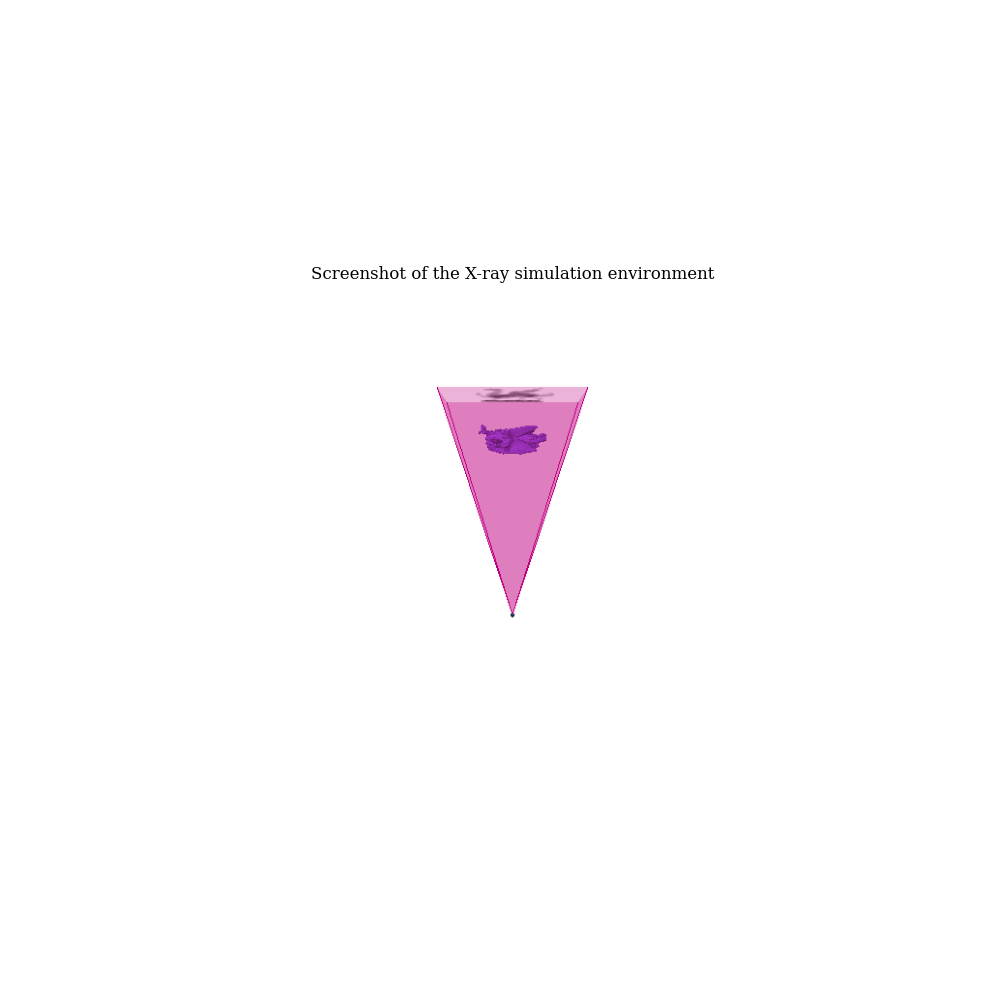

In [24]:
plt.figure(figsize=(10, 10))
plt.imshow(screenshot)
plt.title("Screenshot of the X-ray simulation environment")
plt.axis('off');

# Interactive visualisation

The user can rotate the 3D scene and zoom-in and -out in the visualisation window.

- Keys are:
    - Q/Escape: to quit the event loop (does not close the window)
    - B: display/hide the X-ray beam
    - W: display the polygon meshes in solid or wireframe
    - N: display the X-ray image in negative or positive
    - H: display/hide the X-ray detector
- Mouse interactions:
    - Zoom in/out: mouse wheel
    - Rotation: Right mouse button down + move cursor
    
**Note: this function has no effect on supercomputers and on the cloud, but will work on a desktop or laptop computer.**

In [25]:
gvxr.renderLoop()

# All done

In [26]:
gvxr.terminate()

Wed Sep 28 19:59:12 2022 ---- Destroy all the windows
Wed Sep 28 19:59:12 2022 ---- Destroy window 0(0x561536b2b640)
